# multilevel classification 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)

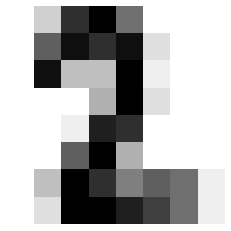

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train[0]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")


plt.show()

In [8]:
y_train[0]

2

In [9]:
#lets make multiclassifier

In [10]:
from sklearn.linear_model import SGDClassifier   #automatically runs OvA 

sgd_clf = SGDClassifier(random_state=42)


sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([2])

In [11]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-5798.49283312, -4095.80353671,  3702.1556573 , -1516.98373125,
        -5039.24614592, -2814.92740216, -4655.66188935, -2524.83588306,
        -1751.57920211, -2617.2552933 ]])

In [14]:
np.argmax(some_digit_scores)

2

In [12]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
sgd_clf.classes_[2]

2

1. If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. 
2. Simply create an instance
and pass a binary classifier to its constructor. 

3. For example, this code creates a multi‐
class classifier using the OvO strategy, based on a SGDClassifier

In [16]:
#Ovo

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([2])

In [17]:
len(ovo_clf.estimators_)


45

In [20]:
#randomforest

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([2])

Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes.

predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class

In [22]:
some_digit_prob  =  forest_clf.predict_proba([some_digit])
some_digit_prob

array([[0.  , 0.01, 0.96, 0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.  ]])

the classifier is fairly confident about its prediction: the 0.96 at the 2th
index in the array means that the model estimates a 96% probability that the image
represents a 5. 

In [23]:
np.argmax(some_digit_prob)

2

In [26]:
forest_clf.classes_[2]

2

# evaluate these classifiers.

In [33]:
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(np.mean(score1))
score1

0.9487750556792873


array([0.93541203, 0.94877506, 0.96213808])

it gets over 93% on all test folds.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(np.mean(score))
score

0.9487750556792873


array([0.9532294 , 0.93541203, 0.95768374])

scaleing doesnt effect much to the test accuracy as did in books example

# Error Analysis

In [35]:
#confusion metrix

In [37]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train,cv=3)

In [41]:
from sklearn.metrics import confusion_matrix
con_mtrx = confusion_matrix(y_train, y_train_pred)
con_mtrx

array([[140,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 130,   0,   2,   1,   0,   2,   0,   3,   1],
       [  0,   2, 129,   1,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0, 127,   0,   5,   0,   2,   3,   1],
       [  0,   0,   0,   0, 140,   0,   0,   0,   3,   0],
       [  0,   1,   0,   1,   0, 128,   1,   1,   0,   2],
       [  0,   1,   0,   0,   1,   1, 125,   0,   1,   0],
       [  0,   0,   0,   2,   0,   0,   0, 127,   1,   1],
       [  0,   7,   0,   3,   1,   1,   2,   0, 111,   1],
       [  0,   2,   0,   4,   0,   0,   0,   1,   5, 121]], dtype=int64)

In [42]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

That’s a lot of numbers. It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s matshow() function

<Figure size 1440x1440 with 0 Axes>

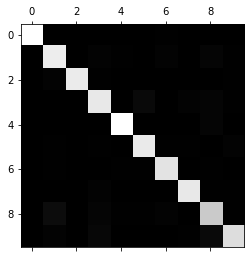

In [48]:
plt.figure(figsize= (20,20))
plt.matshow(con_mtrx, cmap = plt.cm.gray)
plt.show()

#rows represent actual classes, while columns represent predicted classes

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. 

The 8s look slightly darker than the
other digits, which could mean that there are fewer images of 8s in the dataset or that
the classifier does not perform as well on 8s as on other digits

In [61]:
df =pd.DataFrame(X_train )
df['y'] = y_train
df.y .value_counts()

4    143
0    141
1    139
3    138
5    134
2    133
9    133
7    131
6    129
8    126
Name: y, dtype: int64

Let’s focus the plot on the errors. 

First, you need to divide each value in the confusion
matrix by the number of images in the corresponding class, so you can compare errorrates instead of absolute number of errors (

In [106]:
row_sums = con_mtrx.sum(axis=1, keepdims=True)
norm_conf_mx = con_mtrx / row_sums
print(norm_conf_mx[:3,:3])
norm_conf_mx


[[0.9929078  0.         0.        ]
 [0.         0.9352518  0.        ]
 [0.         0.01503759 0.96992481]]


array([[0.9929078 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0070922 , 0.        , 0.        , 0.        ],
       [0.        , 0.9352518 , 0.        , 0.01438849, 0.00719424,
        0.        , 0.01438849, 0.        , 0.02158273, 0.00719424],
       [0.        , 0.01503759, 0.96992481, 0.0075188 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0075188 ],
       [0.        , 0.        , 0.        , 0.92028986, 0.        ,
        0.03623188, 0.        , 0.01449275, 0.02173913, 0.00724638],
       [0.        , 0.        , 0.        , 0.        , 0.97902098,
        0.        , 0.        , 0.        , 0.02097902, 0.        ],
       [0.        , 0.00746269, 0.        , 0.00746269, 0.        ,
        0.95522388, 0.00746269, 0.00746269, 0.        , 0.01492537],
       [0.        , 0.00775194, 0.        , 0.        , 0.00775194,
        0.00775194, 0.96899225, 0.        , 0.00775194, 0.        ],
       [0.        , 0.        , 0.       

Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

In [104]:
np.fill_diagonal(norm_conf_mx, 0)
print(norm_conf_mx[:3,:3])

[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.01503759 0.        ]]


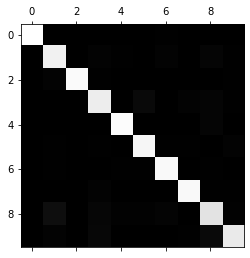

In [107]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


in book example fig


Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The column for
class 8 is quite bright, which tells you that many images get misclassified as 8s. 

How‐
ever, the row for class 8 is not that bad, telling you that actual 8s in general get prop‐
erly classified as 8s. 

As you can see, the confusion matrix is not necessarily
symmetrical. You can also see that 3s and 5s often get confused (in both directions).
Analyzing the confusion matrix can often give you insights on ways to improve your
classifier. Looking at this plot, it seems that your efforts should be spent on reducing
the false 8s.

fig - link 
file:///E:/books/2-Aur%C3%A9lien-G%C3%A9ron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-O%E2%80%99Reilly-Media-2019.pdf

# Multilabel Classication

1. want your classifier to output multiple classes for each instance.

2. face-recognition classifier: what should it do if it recognizes several people
on the same picture

3. recognize three faces, Alice, Bob, and Charlie;
when it is shown a picture of Alice and Charlie, it should output [1, 0, 1]
4. Such a classification system that outputs multiple
binary tags is called a multilabel classification system.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]


In [111]:
y_multilabel

array([[False, False],
       [ True, False],
       [ True,  True],
       ...,
       [ True,  True],
       [ True,  True],
       [ True, False]])

1. This code creates a y_multilabel array containing two target labels for each digit
image: 
2. the first indicates whether or not the digit is large (7, 8, or 9) and 
3. the second
indicates whether or not it is odd. 

In [112]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [113]:
knn_clf.predict([some_digit])


array([[False, False]])

In [118]:
#some_digit= X_train[0]
y_train[0]

2

In [120]:
#let 
some_digit1= X_train[7]
print(y_train[7])
knn_clf.predict([some_digit1])

9


array([[ True,  True]])

In [121]:
#evaluation of model

one approach is to measure the F1
 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score

In [124]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9820990302926285

This assumes that all labels are equally important, which may not be the case. 

In par‐
ticular, if you have many more pictures of Alice than of Bob or Charlie, you may want
to give more weight to the classifier’s score on pictures of Alice. One simple option is
to give each label a weight equal to its support (i.e., the number of instances with that
target label). To do this, simply set average="weighted" in the preceding code.

In [126]:
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred,  average="weighted")

0.9835320167810259

In [136]:
from sklearn import metrics
metrics.accuracy_score(y_multilabel, y_train_knn_pred)

0.9784706755753526